## Erzeugung synthetischer Daten

### Synthetische Daten mit Python


<img width="60%" class="imgright" src="../images/robots_creating_data.webp" srcset="../images/robots_creating_data_500w.webp 500w,../images/robots_creating_data_400w.webp 400w,../images/robots_creating_data_350w.webp 350w,../images/robots_creating_data_300w.webp 300w" alt="Roboter erzeugen synthetische Daten" />

Ein Problem des maschinellen Lernens, - insbesondere wenn man sich am Einarbeiten ist mehr  über die Algorithmen erfahren möchte, - besteht darin, dass es oft schwierig ist, geeignete Testdaten zu erhalten. Einige kosten viel Geld, andere sind nicht frei verfügbar, weil sie urheberrechtlich geschützt sind. Deshalb können künstlich erzeugte  Testdaten in einigen Fällen eine Lösung sein.

Aus diesem Grund befasst sich dieses Kapitel unseres Tutorials mit der künstlichen Datenerzeugung.
In diesem Kapitel geht es darum, künstliche Daten zu erstellen.
In den vorherigen Kapiteln unseres Tutorials haben wir gelernt, dass Scikit-Learn (sklearn) verschiedene Datensätze enthält. Einerseits gibt es kleine Spielzeug-Datensätze, andererseits bietet dieses Modul  auch größere Datensätze, die häufig verwendet werden, um Algorithmen zu testen oder auch als Benchmark zu dienen. `sklearn` bietet uns Daten, die aus der "realen Welt" stammen.

All dies ist großartig, aber in vielen Fällen reicht dies immer noch nicht aus. Vielleicht findet man die richtigen Art von Daten, aber man benötigt mehr Daten dieser Art, oder die Daten entsprechen nicht vollständig dem, was man sucht. So benötigt man beispielsweise komplexere oder weniger komplexere Daten. Dies ist der Punkt, an dem man in Betracht ziehen sollte, die Daten selbst zu erstellen. Hier bietet `sklearn` Hilfe an. Es enthält verschiedene random-Beispielgeneratoren, mit denen benutzerdefinierte künstliche Datasets erstellt werden können. Datasets, die den eigenen Ideen von Größe und Komplexität entsprechen. 

Der folgende Python-Code ist ein einfaches Beispiel, eines welches noch nicht `sklearn` benutzt. Wir erzeugen künstliche Wetterdaten für einige deutsche Städte. Dazu verwenden wir Pandas und Numpy, um die Daten zu erstellen: 

In [1]:
import numpy as np
import pandas as pd


cities = ['Berlin', 'Frankfurt', 'Hamburg', 
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanover', 'Saarbruecken', 'Cologne',
          'Constance', 'Freiburg', 'Karlsruhe'
         ]

n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),
        'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n)
       }
df = pd.DataFrame(data=data, index=cities)
df


,Temperature,Humidity,Wind
Berlin,23.380272,74.519721,10.126527
Frankfurt,21.871642,78.543643,16.488279
Hamburg,20.202524,79.515279,16.369214
Nuremberg,22.187302,75.085947,12.702130
Munich,24.129428,76.294014,6.712467
Stuttgart,24.356583,79.098416,7.783926
Hanover,27.544254,79.243008,14.855937
Saarbruecken,27.892038,82.066045,11.113903
Cologne,20.333795,83.582715,12.217552
Constance,27.000800,81.238455,8.384035


### Ein weiteres Beispiel

Wir erzeugen nun synthetische Daten für vier nicht existierende Blumensorten:

- Flos Pythonem
- Flos Java
- Flos Margarita
- Flos artificialis

Die durchschnittlichen RGB-Farbwerte entsprechen folgenden Werten:
- (255, 0, 0)
- (245, 107, 0)
- (206, 99, 1)
- (255, 254, 101)

Der durchschnittliche Durchmesser des Calyx ist: 
- 3.8
- 3.3
- 4.1
- 2.9

<table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="background-color:#fe0000;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Flos pythonem<br>(254, 0, 0)<br></th><th style="background-color:#f56b00;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:normal;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Flos Java<br>(245, 107, 0)<br></th></tr></thead><tbody><tr><td style="background-color:#ce6301;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Flos margarita<br>(206, 99, 1)<br></td><td style="background-color:#fffe65;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">Flos artificialis<br>(255, 254, 101)<br></td></tr></tbody></table>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)

def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)

# number of items for each flower class:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}
# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
                             num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                             num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
                             num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                             num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

# flos Java:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
                             num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
                             num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
                             num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
                             num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data


data = np.concatenate((flowers["flos_pythonem"], 
                      flowers["flos_java"],
                      flowers["flos_margarita"],
                      flowers["flos_artificialis"]
                     ), axis=0)

# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num
    
conc_data = np.concatenate((data, target.reshape(target.shape[0], 1)),
                           axis=1)

np.savetxt("data/strange_flowers.txt", conc_data, fmt="%2.2f",)

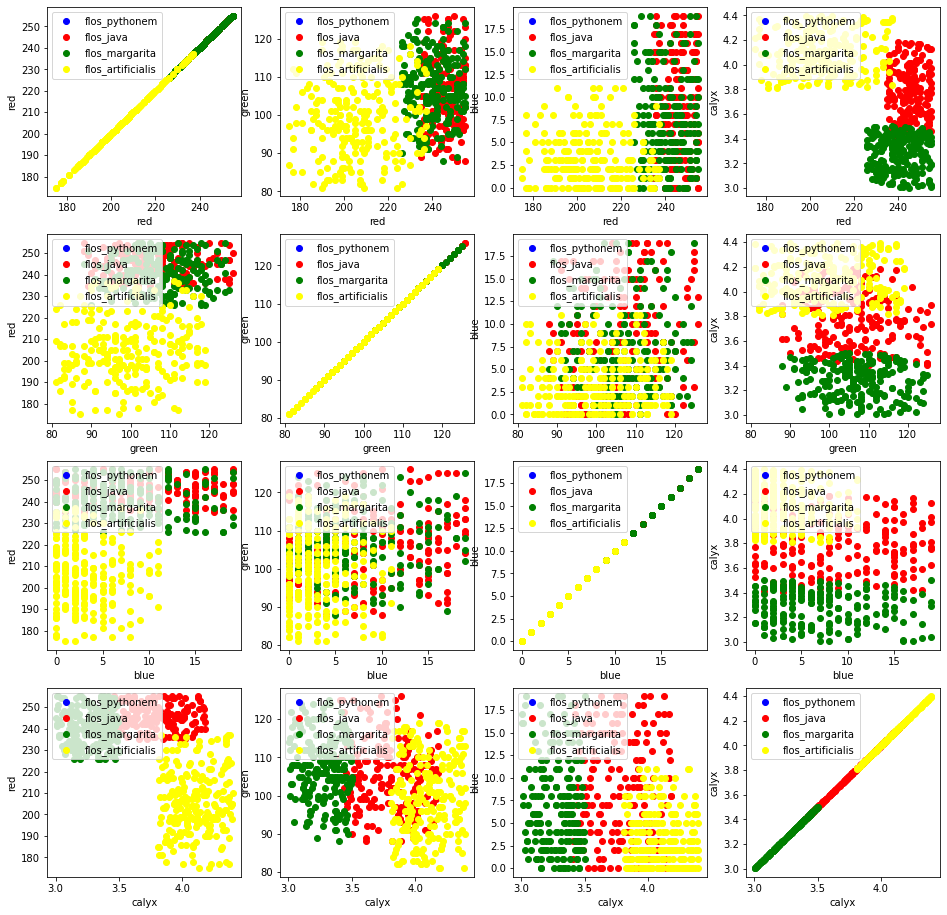

In [8]:
import matplotlib.pyplot as plt

target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green', 'yellow']

for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x], 
                             data[target==color_ind, y],
                             label=target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')


plt.show()

### Synthetische Daten mit sklearn erzeugen

Deutlich einfacher gestaltet sich die Erzeugung von synthetischen Daten mit dem Modul `sklearn`. 

Die in `sklearn` verfügbaren Funktionalitäten können wir folgt gruppiert werden:

1. Generatoren zur Klassifikation und Clustering
2. Generatoren zur Erzeugung von Daten zur Regression
3. Generatoren für "Manifold Learning"
4. Generatoren für Zerlegungs-Probleme (Decomposition)


#### Generatoren zur Klassifikation und Clustering 

Wir starten mit der Funktion ```make_blobs``` von ```sklearn.datasets``` um Klecks-ähnliche (englisch: blob) Daten-Strukturen zu erzeugen. Indem wir den Wert von `centers` auf `n_classes` setzen, bestimmen wir die Anzahl der Blobs, d. h. der Cluster. `n_samples` entspricht der Anzahl der Datenpunkte, gleichverteilt über alle Klassen. Falls `random_state` nicht gesetzt ist, werden wir jedesmal, wenn wir die Funktion aufrufen, andere Zufallwerte erhalten. Wir weisen diesem Parameter eine ganze Zahl zu, um nachvollziehbare WErte zu erzeugen.

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

data, labels = make_blobs(n_samples=1000, 
                          #centers=n_classes, 
                          centers=np.array([[2, 3], [4, 5], [7, 9]]),
                          random_state=1)

labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])